In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
coefficients = pd.read_csv('powerlawfit.csv', header = 0)

In [3]:
coefficients

,a,err_a,Z,fMT
0,-1.252679,0.014081,0.0002,0.1
1,-1.151159,0.004300,0.0004,0.1
2,-1.212940,0.004336,0.0008,0.1
3,-1.208645,0.004758,0.0012,0.1
4,-1.257974,0.004760,0.0016,0.1
...,...,...,...,...
79,-1.212411,0.014342,0.0060,1.0
80,-1.223705,0.024275,0.0080,1.0
81,-1.280680,0.029759,0.0120,1.0
82,-1.322023,0.031884,0.0160,1.0


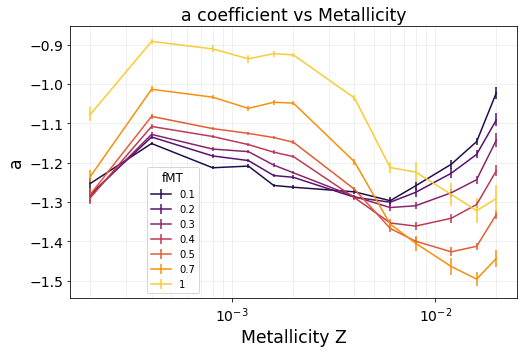

In [4]:
sns.set_palette('inferno', 7)

fMT_csv   = [0.1,0.2,0.3,0.4,0.5,0.7,1]
metallicities = [0.0002,0.0004,0.0008,0.0012,0.0016,0.002,0.004,0.006,0.008,0.012,0.016,0.02]

fig, ax = plt.subplots(figsize = (8,5))
for fMT in fMT_csv :
        data = coefficients[coefficients['fMT'] == fMT]
        plt.errorbar( x = data['Z'], y = data['a'], yerr = data['err_a'], label = str(fMT) )

ax.set_xscale('log')
ax.get_xaxis().set_tick_params(which='minor', size=0)
ax.get_xaxis().set_tick_params(which='minor', width=0)
ax.grid(True, which="both", ls="-",color='0.93')
ax.tick_params(axis='both', which='major', labelsize=14)


plt.xlabel('Metallicity Z', fontsize = 'xx-large')
plt.ylabel('a', fontsize = 'xx-large')
plt.title('a coefficient vs Metallicity', fontsize = 'xx-large')
plt.legend(fontsize = 10, title = 'fMT', title_fontsize = 'large', bbox_to_anchor = (0.3, 0.5) )
plt.savefig('a_vs_Z.png')
plt.show()

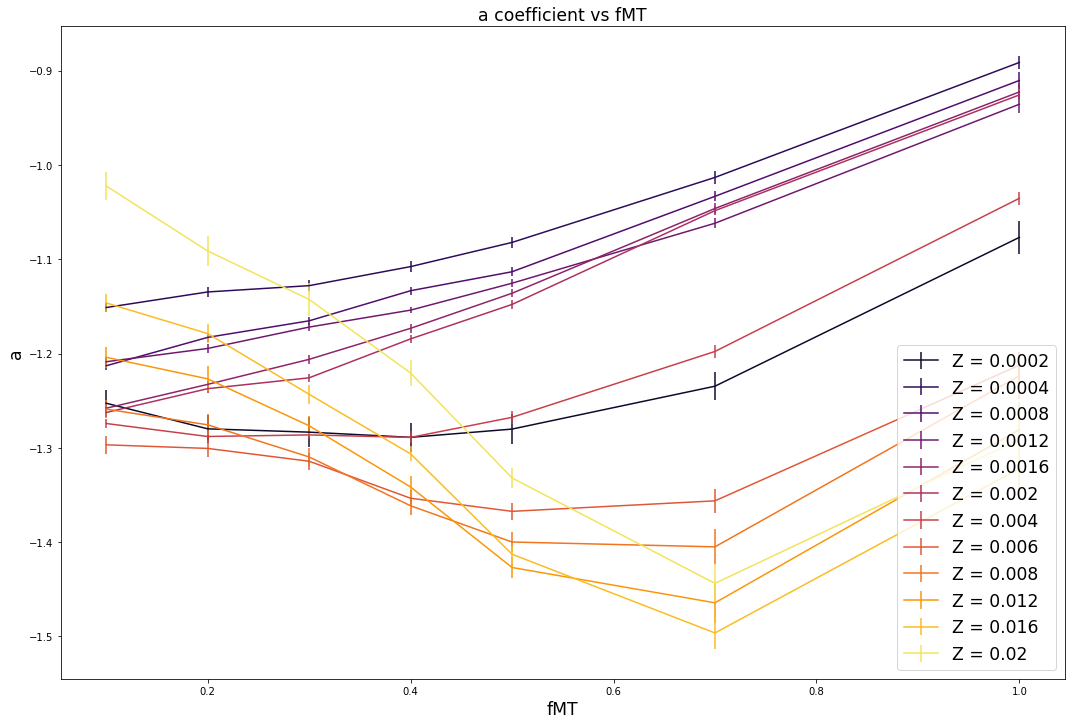

In [5]:
sns.set_palette('inferno', 12)

fig = plt.subplots(figsize = (18,12))
for Z in metallicities :
        data = coefficients[coefficients['Z'] == Z]
        plt.errorbar( x = data['fMT'], y = data['a'], yerr = data['err_a'], label = "Z = "+str(Z) )


plt.xlabel('fMT', fontsize = 'xx-large')
plt.ylabel('a', fontsize = 'xx-large')
plt.title('a coefficient vs fMT', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.savefig('a_vs_fMT.png')
plt.show()

In [6]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.
    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    
    variance = np.average((values-average)**2, weights=weights)
    
    return (average, math.sqrt(variance))

# non conservative systems

In [7]:
coefficients = pd.read_csv('powerlawfit.csv', header = 0, dtype = {'Z' : float, 'fMT' : float})
data_non_conservative = coefficients[coefficients['fMT'] <= 0.5]


a_values = np.array(data_non_conservative.loc[:,'a'])
weights  = np.array(data_non_conservative.loc[:,'err_a'])

print(weighted_avg_and_std(a_values, weights = weights))

(-1.2415218110292094, 0.0913113590903973)


# all systems

In [8]:
coefficients = pd.read_csv('powerlawfit.csv', header = 0, dtype = {'Z' : float, 'fMT' : float})

a_values = np.array(coefficients.loc[:,'a'])
weights  = np.array(coefficients.loc[:,'err_a'])

print(weighted_avg_and_std(a_values, weights = weights))

(-1.2406797131650935, 0.13044378252049624)
